# Методы кластеризации
Шестаков А.В., Панов А.И. Майнор по анализу данных 31/05/2016

**Задача кластеризации** - задача выделения групп похожих друг на друга объектов (и интерпретация полученных групп). <br/>
Кластеризация - это задача unsupervised learning (обучения без учителя), то есть на вход алгоритму поступают лишь чистые данные и никакой разметки.

Методов кластеризации великое множество, выбор лежит полностью на совести исследователя. Определение метода кластеризации может зависеть от 
* Формата исходных данных
* Необходимости в наглядности представления
* Необходимости в интерпретируемости
* Модельных предположений о данных
* ...

## K-Means

Самый простой и известный метод кластеризации, основным понятием которого является центройд $c_k$ (центр кластера). Критерий минимизации: $$ \min J(C) = \min\limits_{c_k} \sum\limits_k\sum\limits_{x_i\in c_k} ||x_i - c_k||^2 $$
Шаги алгоритма
1. Случайно инициализировать центройды
2. Отнести точки к ближайшим центройдам (получаем кластеры)
3. Перенести центройды в центр получившихся кластеров (поправка к оценке координат центройдов)
4. Повторять шаги 2-3 пока критерий не сойдется\кластеры не изменятся

<img src='http://jblomo.github.io/datamining290/slides/img/kmeansclustering.jpg' width=750>

* Какие недостатки сразу бросаются в глаза?
* Как обстоят дела с выбором количества кластеров?
* Необходимо ли нормировать данные?
* Приведите пример данных, которые человек "на глаз" может легко кластеризовать, а k-mean - сделает это неправильно
* Как поменяется алгоритм, если вместо квадрата в $J(C)$ поставить модуль?

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score

%matplotlib inline

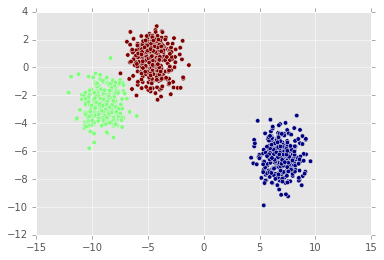

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

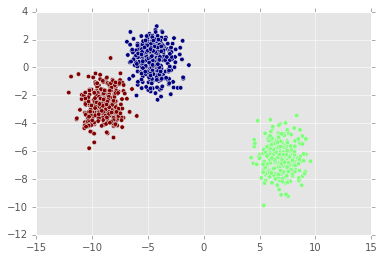

In [4]:
# Применяем k-means
kmeans = KMeans(n_clusters=3)
y_hat = kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y_hat)

Практически идеально! А если мы слегка ухудшим данные? Заодно, давайте узнаем, как можно измерять качество кластеризации, если у нас есть правдивые метки? <br/> Adjusted Rand Index нам в помощь!

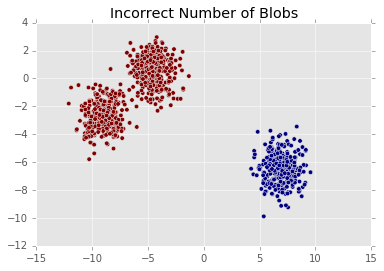

In [5]:
y_pred = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

In [7]:
adjusted_rand_score(y, y_hat), adjusted_rand_score(y, y_pred)

(0.9940120542038232, 0.5716725949351892)

In [4]:
# Исказите данные - умножить на вектор?

In [8]:
# Изобразите scatter

In [9]:
# Как теперь работает Kmeans?

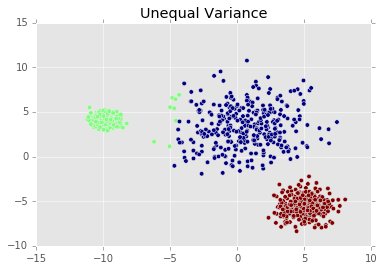

In [10]:
X_varied, y_varied = make_blobs(n_samples=1000,
                                cluster_std=[1.0, 2.5, 0.5])
y_pred = KMeans(n_clusters=3).fit_predict(X_varied)

plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

In [11]:
adjusted_rand_score(y_pred, y_varied)

0.9733005499473553

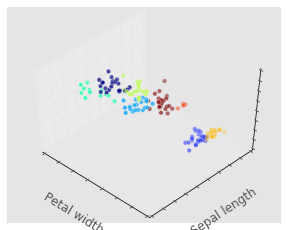

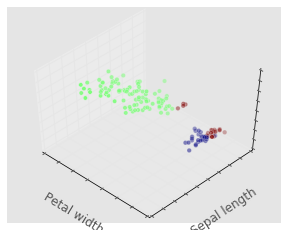

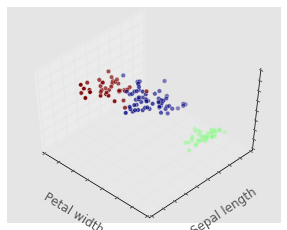

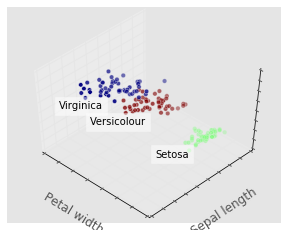

In [12]:
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()

## Иерархическая кластеризация

В отличие от стандартного k-means, на входе алгоритма иерархической кластеризации лежит матрица попарных расстояний между объектами. Идея (аггломеративной) иерархической кластеризации заключается в постепенном объединении объектов во всё более массивные кластеры. 

Вопрос: а как пересчитывать попарные расстояние между кластерами в таком случае?

<img src='http://people.revoledu.com/kardi/tutorial/Clustering/Image/Numerical%20Example_clip_image042.jpg'>

In [13]:
from sklearn.cluster import AgglomerativeClustering
import itertools

X = np.concatenate([np.random.randn(3, 10), np.random.randn(2, 10) + 100])
model = AgglomerativeClustering(linkage="average", affinity="cosine")
model.fit(X)

ii = itertools.count(X.shape[0])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]

[{'left': 3, 'node_id': 5, 'right': 4},
 {'left': 1, 'node_id': 6, 'right': 2},
 {'left': 5, 'node_id': 7, 'right': 6},
 {'left': 0, 'node_id': 8, 'right': 7}]

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [4]:
# Матрицу признакового описания надо отнормировать

Приятная вещица, связанная с иерархической кластеризацией - дендрограмма!

{'color_list': ['g', 'b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 138.0, 138.0, 0.0],
  [0.0, 219.0, 219.0, 0.0],
  [0.0, 255.0, 255.0, 219.0],
  [0.0, 268.0, 268.0, 255.0],
  [138.0, 295.0, 295.0, 268.0]],
 'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75]],
 'ivl': ['2', '5', '1', '0', '3', '4'],
 'leaves': [2, 5, 1, 0, 3, 4]}

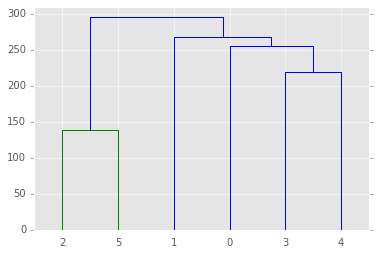

In [7]:
import numpy as np
ytdist = np.array([662., 877., 255., 412., 996., 295., 468., 268., 400., 754., 564., 138., 219., 869., 669.])
# Кластеризация и дендрограмма
Z = linkage(ytdist)
dendrogram(Z)

In [16]:
# Для того, чтобы определить метки кластеров используем fcluster
fcluster(Z, t=150, criterion='distance')

array([4, 5, 1, 2, 3, 1], dtype=int32)

In [19]:
# Теперь то же самое для iris

## Смесь гаусовских распределений (GMM)

Каждая точка представляется ввиде смести гауссовских распределений:

$$P(x) = \sum\limits_k P(x|c_k) \cdot P(c_k) = \mathcal{N}(x| \mu_k, \Sigma_k)\cdot\pi_k$$

В процессе итеративного алгоритма (EM-алгоритм для GMM) определяются параметры $\mu_k, \Sigma_k, \pi_k$, а так же "вклады" каждого распределения в объекты.

* Во-первых, мы получает смягченную кластеризацию
* Во-вторых, ловим чуть более сложные формы кластеров, чем k-means

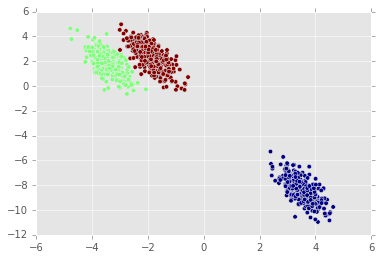

In [20]:
from sklearn.mixture import GMM

X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)

Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X = X.dot(Trans)
plt.scatter(X[:,0], X[:,1], c=y)

In [21]:
# GMM!

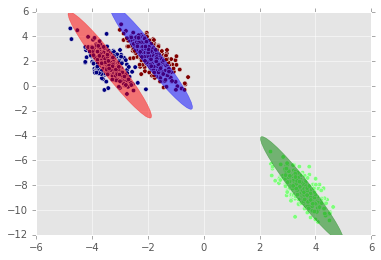

In [63]:
import matplotlib as mpl
def make_ellipses(gmm, ax):
    for n, color in enumerate('rgb'):
        v, w = np.linalg.eigh(gmm._get_covars()[n][:2, :2])
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v *=9
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
plt.scatter(X[:,0], X[:,1], c=y_pred)
make_ellipses(gmm, plt.gca())

In [22]:
# Можем посмотреть на параметры получившихся распределений

## Задание
1. Выберите любую (желательно красочную) картинку, подгузите её с помощью `plt.imread()`
2. Выполните компрессию изображения с помощью метода k-means, т.е. задайте некоторе число кластеров, произведите кластеризацию, затем замените соответствующие пиксели на значения центройдов.

In [23]:
# Здесь происходит закгрузка изображения
# Вы можете скачать любое изображение из интернета или же загрузить стандартные тестовые изображения из skimage.data
# Алгоритм k-means имеет достаточно большую сложность, поэтому рекомендуется использовать небольшие изображения для отладки,
# не более 128x128 пикселей. 

import skimage
import skimage.data
from skimage.io import imread

#img_path = "03.jpg"
#image = imread(img_path)
image = skimage.data.astronaut()

# Сохраняет исходное изображения под другим имененм. Просто для сравнения.

# Создаем из исходного изображения матрицу ширина х высота х 3 (количество цеветов формата rgb)


In [24]:
# Разворачиваем исходную матрицу в список обучающих примеров: кол-во пикселей х 3. Получается, что цвета
# предсталяют собой признаки каждого обучающего объекта.


## Заготовка класса для k-means

Используйте нижележащую заготовку для реализации алгоритма k-means. Вам необходимо реализовать функции _compute_centroids и _determine_closest_centroids. Также рекомендуется реализовать функцию _quality для отладки алгоритма. Формула расчета центроидов кластеров: 

$ \mu_y = \frac{\sum_{i=1}^l[y^i=y]x^i}{\sum_{i=1}^l[y^i=y]} $ - усредненное значение векторов, отнесенных к кластеру y.

Функциоанл качества кластеризации:

$ Q = \frac{1}{l}\sum_{i=1}^l(\rho(x^i,\mu_{y^i}))^2 $, где $\rho$ - евклидово расстояние.

In [53]:
import logging
import random

import numpy as np
import skimage.data

class SimpleKMeans:
    def __init__(self, k, max_iterations=100, tol=0.0001, verbose=False, qual=False):
        self.k_ = k
        self.max_iterations_ = max_iterations
        self.centroids_ = np.array([])
        self.tol_ = tol
        self.verobose_ = verbose
        self.qual_ = qual
        if verbose:
            self.logger = logging.getLogger(self.__class__.__name__)
            self.logger.setLevel(logging.DEBUG)

    # Функция принимает на вход обучающие объекты X, массив с целочисленными идентификаторами кластеров idx,
    # количество кластеров k. Функция возвращает центроиды класторов.
    def _compute_centroids(self, X, idx, k):
        centroids = np.zeros((k, 3))
        for i in range(k):
            aver = sum([X[j] for j in range(X.shape[0]) if idx[j] == i])
            num = np.count_nonzero(idx == i)
            if num > 0:
                centroids[i] = aver / num
        return centroids

    def _init_centroids(self, X, k):
        # Your code
        return X[indx]

    # Функция принимает на вход обучающие объекты X, центроиды кластеров centroids, количество кластеров k.
    # Функция вовращает список целочисленных идентификаторов кластеров для каждого объекта из X (len(X) == len(idx)).
    # При назначении кластера объекту ищется тот кластер, квадрат расстояния от объекта до центроида которого
    # - наименьшее. Используйте евклидово расстояние.
    def _determine_closest_centroids(self, X, centroids, k):
        # Your code
        return idx

    # Функция возращает значения функционала качества кластеризации для текующих центроидов кластеров.
    def _quality(self, X, centroids, idx):
        Q = sum([np.linalg.norm(centroids[idx[j]] - X[j]) for j in range(X.shape[0])]) / X.shape[0]
        return Q

    def fit(self, X):
        centroids = self._init_centroids(X, self.k_)
        self.centroids_ = np.copy(centroids)
        for n in range(self.max_iterations_):
            if self.verobose_:
                self.logger.debug("Iteration: %d", n)

            idx = self._determine_closest_centroids(X, centroids, self.k_)
            centroids = self._compute_centroids(X, idx, self.k_)

            if self.qual_:
                qual = self._quality(X, centroids, idx)
                self.logger.debug("Qual: %f", qual)

            diff = np.linalg.norm(self.centroids_ - centroids)
            if self.verobose_:
                self.logger.debug("Diff: %f", diff)

            self.centroids_ = np.copy(centroids)

            if diff < self.tol_:
                break

    def predict(self, X):
        return self._determine_closest_centroids(X, self.centroids_, self.k_)

In [54]:
# Обучаем кластеризатор, чтобы он мог преобразовать все цвета изображения в k=16 цветов. 
# Когда verbose = True в ходе бучения будут распечатываться логи обучения.
# При qual = True будут также распечатываться значения фукнционала качества. Обратите внимание, что 
# значения функционала качества должны уменьшаться на каждой итерации, в противном случае в Вашем 
# коде присутсвует ошибка.

cl = SimpleKMeans(k = 16, max_iterations=100, tol=0.01, verbose = False)
cl.fit(X)

In [55]:
# Определяем идентификаторы каждого пискселя (номер цвета).

res = cl.predict(X)
res[50:60]

array([11, 11, 11, 11, 11, 11, 11, 13, 13, 11])

In [56]:
# Преобразуем цвета пикселей изображения. Восстанавливаем исходную матрицу изображения ширина х высота х 3.
# Сохарняем получившееся изображение.

X_transformed =  cl.centroids_[res]
new_image = X_transformed.reshape(img_float.shape[0], img_float.shape[1], 3)
new_save_path = "transformed_image.jpg"
skimage.io.imsave(new_save_path, new_image)